In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import wandb

from wavenet import model, train, sample, audio, datasets, utils, viz

In [3]:
p = model.HParams()
m = model.Wavenet(p)
m.load_state_dict(torch.load('/home/purzelrakete/src/github.com/feldberlin/wavenet/wandb/latest-run/files/checkpoints.best.test'));

In [4]:
_, tracks = sample.sample(m, decoder=utils.decode_random, n_samples=16000, batch_size=15)

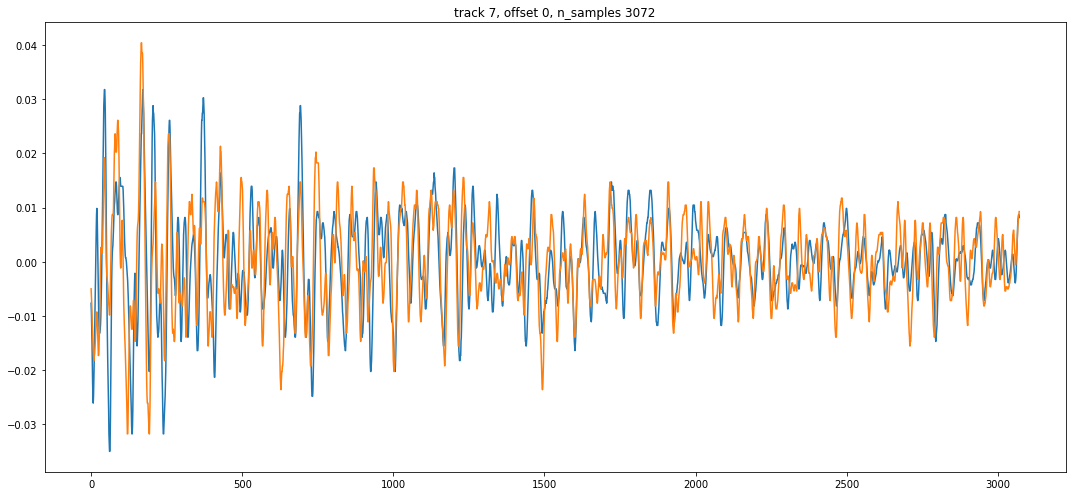

In [5]:
track_i = viz.plot_track(tracks, n_samples=p.receptive_field_size())

In [6]:
for t in tracks:
    display(ipd.Audio(audio.mu_expand(t, p), rate=p.sampling_rate))

In [7]:
_, tracks = sample.sample(m, decoder=utils.decode_nucleus(), n_samples=16000, batch_size=15)

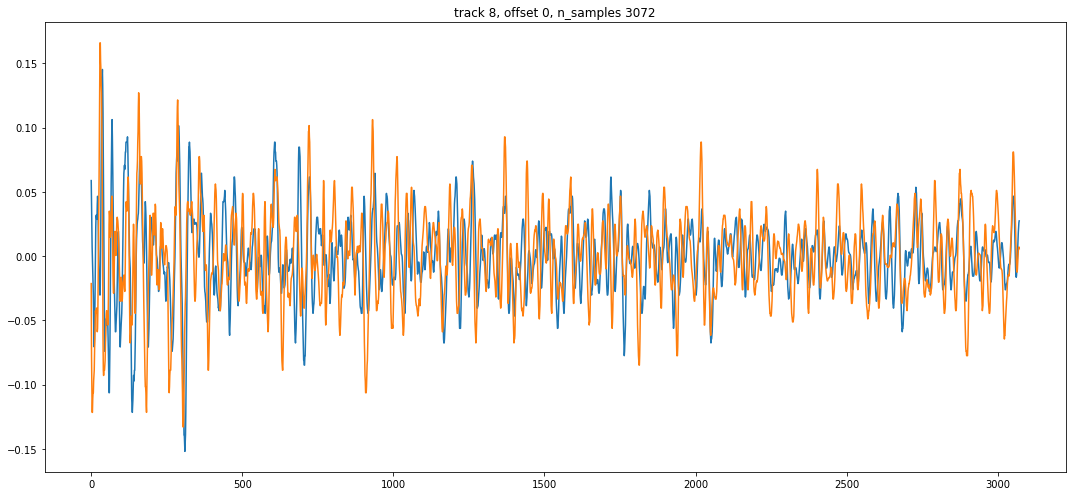

In [8]:
track_i = viz.plot_track(tracks, n_samples=p.receptive_field_size())

In [9]:
for t in tracks:
    display(ipd.Audio(audio.mu_expand(t, p), rate=p.sampling_rate))